In [61]:
import pandas as pd

# Load dataset
df = pd.read_csv("combined_class.csv")

print(df.shape)
print(df.head())

(300261, 11)
     airline  flight source_city departure_time  stop arrival_time  \
0  Air India     868       Delhi        Evening     0        Night   
1  Air India     624       Delhi        Evening     0        Night   
2  Air India     531       Delhi          Night     1        Night   
3  Air India     839       Delhi          Night     1        Night   
4  Air India     544       Delhi        Evening     1        Night   

  destination_city     class  duration  days_left  price  
0           Mumbai  Business      2.00          1  25612  
1           Mumbai  Business      2.25          1  25612  
2           Mumbai  Business     24.75          1  42220  
3           Mumbai  Business     26.50          1  44450  
4           Mumbai  Business      6.67          1  46690  


In [62]:
X = df[["airline", "class", "stop", "duration", "days_left", "departure_time"]]  # inputs
y = df["price"]  # target variable

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical & numeric columns
cat_cols = ["airline", "class", "stop", "departure_time"]
num_cols = ["duration", "days_left"]

# Transformer: convert categoricals into numbers
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Build pipeline: preprocess + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train model
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

Linear Regression - RMSE: 7155.94, MAE: 4924.59


In [66]:
import pandas as pd

# Load the full combined dataset
df_full = pd.read_csv("combined_class.csv")

# Make predictions on the whole dataset (or just test set)
y_pred_full = model.predict(X)  # X = features from full df

# Add predictions to the dataframe
df_full["Predicted Price"] = y_pred_full

# Filter only Air India flights
air_india_flights = df_full[df_full["airline"] == "Air India"]

# Show first 10 Air India flights with actual + predicted
print(air_india_flights.head(10)[[
    "airline", "class", "stop", "duration", "days_left",
    "departure_time", "price", "Predicted Price"
]])

      airline     class  stop  duration  days_left departure_time  price  \
0   Air India  Business     0      2.00          1        Evening  25612   
1   Air India  Business     0      2.25          1        Evening  25612   
2   Air India  Business     1     24.75          1          Night  42220   
3   Air India  Business     1     26.50          1          Night  44450   
4   Air India  Business     1      6.67          1        Evening  46690   
6   Air India  Business     1     17.75          1          Night  50669   
7   Air India  Business     1     22.75          1        Evening  51059   
10  Air India  Business     1     11.00          1          Night  56081   
11  Air India  Business     1     15.25          1        Evening  56081   
12  Air India  Business     1     11.42          1          Night  57074   

    Predicted Price  
0      42240.799643  
1      42257.387804  
2      51215.054118  
3      51331.171246  
4      50209.215003  
6      50750.585607  
7      51

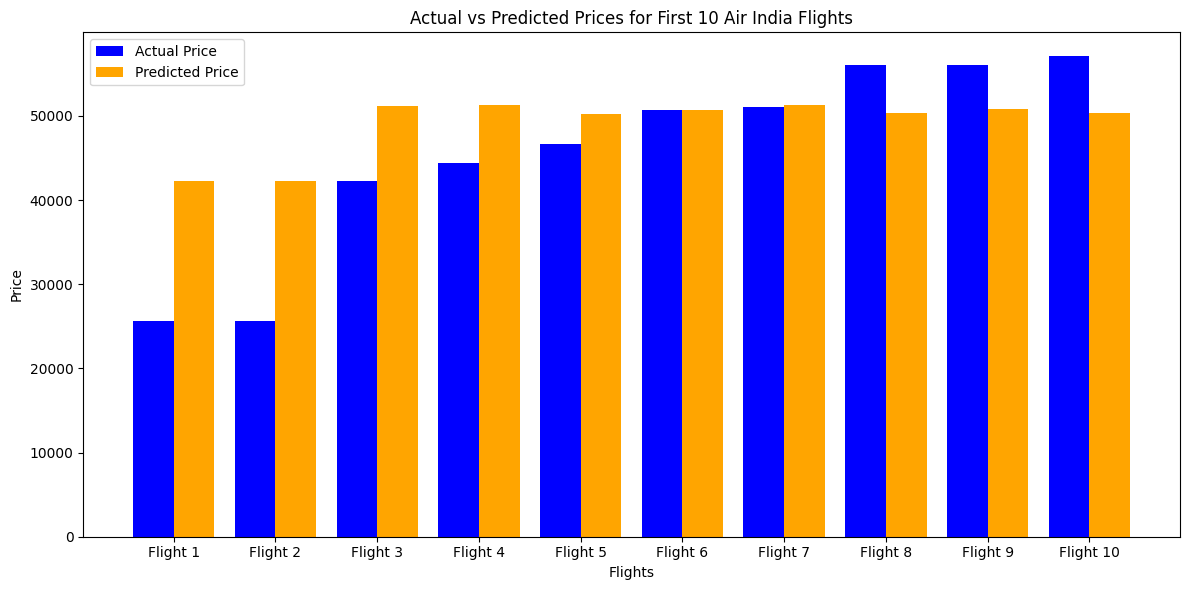


🔹 First 10 Air India Flights (Actual vs Predicted):
  airline    class  stop  duration  days_left departure_time  price  Predicted Price
Air India Business     0      2.00          1        Evening  25612     42240.799643
Air India Business     0      2.25          1        Evening  25612     42257.387804
Air India Business     1     24.75          1          Night  42220     51215.054118
Air India Business     1     26.50          1          Night  44450     51331.171246
Air India Business     1      6.67          1        Evening  46690     50209.215003
Air India Business     1     17.75          1          Night  50669     50750.585607
Air India Business     1     22.75          1        Evening  51059     51276.165526
Air India Business     1     11.00          1          Night  56081     50302.705257
Air India Business     1     15.25          1        Evening  56081     50778.520692
Air India Business     1     11.42          1          Night  57074     50330.573368


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === 1. Load your full dataset ===
df_full = pd.read_csv("combined_class.csv")

# === 2. Make predictions on the full dataset ===
y_pred_full = model.predict(X)  # X = features you defined earlier
df_full["Predicted Price"] = y_pred_full

# === 3. Filter Air India flights (first 10 only) ===
air_india_flights = df_full[df_full["airline"] == "Air India"].head(10)

# === 4. Plot Actual vs Predicted (side-by-side bar chart) ===
x = np.arange(len(air_india_flights))  # flight index positions
width = 0.4  # width of bars

plt.figure(figsize=(12,6))
plt.bar(x - width/2, air_india_flights["price"], width, label="Actual Price", color="blue")
plt.bar(x + width/2, air_india_flights["Predicted Price"], width, label="Predicted Price", color="orange")

# Use simple labels (Flight 1 … Flight 10)
plt.xticks(x, [f"Flight {i+1}" for i in range(len(air_india_flights))])

plt.xlabel("Flights")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices for First 10 Air India Flights")
plt.legend()
plt.tight_layout()
plt.show()

# === 5. Print table with details ===
results_table = air_india_flights[[
    "airline", "class", "stop", "duration", "days_left", 
    "departure_time", "price", "Predicted Price"
]]

print("\n🔹 First 10 Air India Flights (Actual vs Predicted):")
print(results_table.to_string(index=False))

In [69]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset (make sure df_full exists already with Predicted Price column)
df_full = pd.read_csv("combined_class.csv")
df_full["Predicted Price"] = model.predict(X)  # add predictions

# === Evaluation ===
mae = mean_absolute_error(df_full["price"], df_full["Predicted Price"])
rmse = np.sqrt(mean_squared_error(df_full["price"], df_full["Predicted Price"]))

# === Mean of actual prices (from dataset) ===
mean_price = df_full["price"].mean()

# === Convert to percentage ===
mae_percent = (mae / mean_price) * 100
rmse_percent = (rmse / mean_price) * 100

print("🔹 Model Evaluation")
print(f"Average Actual Price: {mean_price:.2f}")
print(f"MAE: {mae:.2f}  ({mae_percent:.2f}%)")
print(f"RMSE: {rmse:.2f}  ({rmse_percent:.2f}%)")

🔹 Model Evaluation
Average Actual Price: 20883.72
MAE: 4904.72  (23.49%)
RMSE: 7122.51  (34.11%)


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# === 1. Load dataset ===
df_full = pd.read_csv("combined_class.csv")

# Target & Features
y = df_full["price"]
X = df_full.drop(columns=["price"])

# Categorical + numeric features
cat_cols = ["airline", "class", "stop", "departure_time"]
num_cols = ["duration", "days_left"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# === 2. Train model (Linear Regression) ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

# === 3. Predict on full dataset ===
y_pred_full = model.predict(X)
df_full["Predicted Price"] = y_pred_full

# === 4. Evaluate ===
r2 = r2_score(y, y_pred_full)
mae = mean_absolute_error(y, y_pred_full)
rmse = np.sqrt(mean_squared_error(y, y_pred_full))

print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.90
MAE: 4904.72
RMSE: 7122.51



🔹 Top factors driving flight price prediction:

                              Feature  Importance
9                  cat__class_Economy    0.495240
8                 cat__class_Business    0.421778
18                      num__duration    0.063965
7                cat__airline_Vistara    0.005658
0              cat__airline_Air India    0.004617
15        cat__departure_time_Evening    0.001599
14  cat__departure_time_Early_Morning    0.001212
12                        cat__stop_2    0.001150
17          cat__departure_time_Night    0.001138
11                        cat__stop_1    0.001053


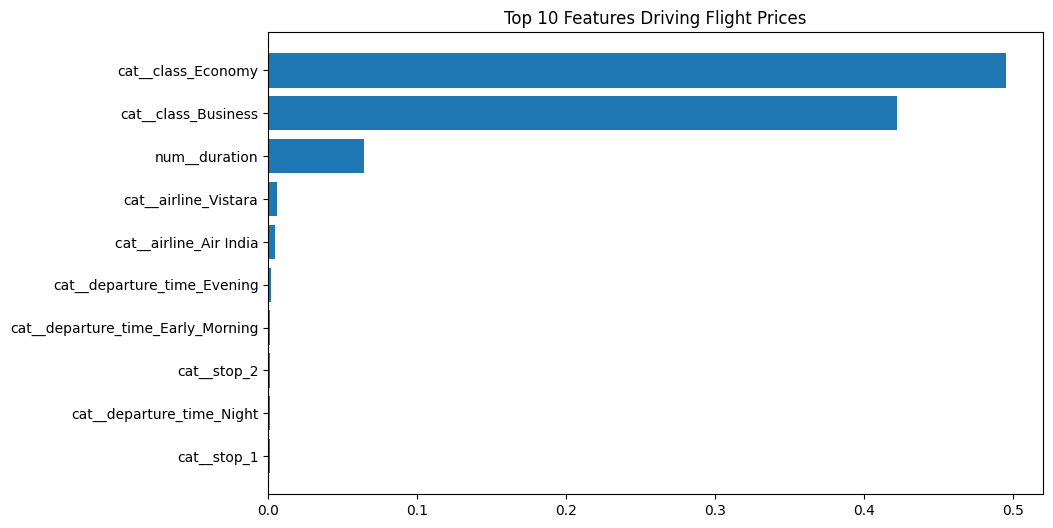

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# === Train a Random Forest model with preprocessing ===
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

pipe_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),   # same preprocessor you used before
    ("regressor", model_rf)
])

pipe_rf.fit(X_train, y_train)

# === Get feature names after preprocessing ===
feature_names = pipe_rf.named_steps["preprocessor"].get_feature_names_out()
importances = pipe_rf.named_steps["regressor"].feature_importances_

# === Create importance DataFrame ===
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\n🔹 Top factors driving flight price prediction:\n")
print(feat_imp.head(10))

# === Plot top 10 features ===
plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"][:10], feat_imp["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Features Driving Flight Prices")
plt.show()